In [1]:
from ko_text import *

# data는 e9t(Lucy Park)님께서 github에 공유해주신 네이버 영화평점 데이터를 사용하였습니다.
# https://github.com/e9t/nsmc

# Data load

In [2]:
train_df = pd.read_csv('ratings_train.txt', sep='\t').dropna()

In [3]:
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [4]:
train_df.shape

(149995, 3)

In [5]:
train_df.groupby('label').count()

,id,document
label,,
0,75170,75170
1,74825,74825


In [6]:
test_df = pd.read_csv('ratings_test.txt', sep = '\t').dropna()

In [7]:
test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [8]:
test_df.shape

(49997, 3)

In [9]:
test_df.groupby('label').count()

,id,document
label,,
0,24826,24826
1,25171,25171


# Preprocess

In [10]:
nlp = NLP()

In [11]:
train_token_ls = nlp.extract_tokens_for_all_document_FAST_VERSION(train_df['document'])
test_token_ls = nlp.extract_tokens_for_all_document_FAST_VERSION(test_df['document'])

In [12]:
train_token_ls[1]

['포스터', '보고', '초딩', '영화', '오버', '연기', '조차', '가볍지', '않구나']

In [13]:
train_df['token'] = train_token_ls
test_df['token'] = test_token_ls

In [14]:
train_df['len'] = [len(x) for x in train_token_ls]
test_df['len'] = [len(x) for x in test_token_ls]

In [15]:
train_df.head()

,id,document,label,token,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,"[더빙, 진짜, 짜증나네요, 목소리]",4
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,"[포스터, 보고, 초딩, 영화, 오버, 연기, 조차, 가볍지, 않구나]",9
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[무재, 밓었, 다그, 래서, 보는것을, 추천]",6
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,"[교도소, 이야기, 구먼, 솔직히, 재미, 없다, 평점, 조정]",8
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[사이, 몬페, 익살스런, 연기, 돋보였던, 영화, 스파이더맨, 에서, 늙어, 보이...",16


## Token의 수가 0개인 리뷰도 있다..

In [16]:
train_df[['len']].describe()

,len
count,149995.000000
mean,8.421821
std,7.265146
min,0.000000
25%,4.000000
50%,6.000000
75%,10.000000
max,67.000000


In [17]:
train_df.loc[train_df['len'] == 0].head(10)

,id,document,label,token,len
151,7348295,아,0,[],0
159,7781028,10점,1,[],0
287,6081437,굳굳,1,[],0
319,4913424,처ㅝ주,1,[],0
384,7679615,잼,1,[],0
404,4221289,What is this movie for?,0,[],0
412,9509970,Yesterday when i was young,1,[],0
470,10147571,once upon a dream,1,[],0
485,9659875,ㄵ 5점대asfgsdlgkbjsjvb,0,[],0
489,3978509,즐~~~~~,0,[],0


# **TF-IDF**

In [23]:
tfidf = TfidfVectorizer(min_df = 3,
                        max_features = 50000,
                        max_df = 0.5)

In [24]:
X_train = tfidf.fit_transform([' '.join(doc) for doc in train_token_ls])

In [25]:
X_train.shape

(149995, 30532)

In [26]:
X_test = tfidf.transform([' '.join(doc) for doc in test_token_ls])

In [27]:
X_test.shape

(49997, 30532)

## **Logistic Regression**

In [28]:
clf = LogisticRegression()
clf.fit(X_train, train_label_ls)

y_pred = clf.predict(X_test)

print('Accuracy : ', accuracy_score(y_pred, test_label_ls))

Accuracy :  0.8353101186071165


## **SVM**

In [29]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [30]:
clf = LinearSVC()
clf.fit(X_train, train_label_ls)

y_pred = clf.predict(X_test)

print('Accuracy : ', accuracy_score(y_pred, test_label_ls))

Accuracy :  0.8294697681860912


# **Doc2Vec**

In [28]:
nlp.make_Doc2Vec_model(window = 3, 
                       vector_size= 30, 
                       min_count= 3)
nlp.build_and_train_Doc2Vec_model(train_token_ls, train_label_ls)

In [29]:
X_train = nlp.infer_vectors_with_Doc2Vec(train_token_ls)
X_test = nlp.infer_vectors_with_Doc2Vec(test_token_ls)

## **Logistic Regression**

In [30]:
clf = LogisticRegression()
clf.fit(X_train, train_label_ls)

y_pred = clf.predict(X_test)

print('Accuracy : ', accuracy_score(y_pred, test_label_ls))

Accuracy :  0.7483849030941857


## **SVM**

In [31]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [32]:
clf = LinearSVC()
clf.fit(X_train, train_label_ls)

y_pred = clf.predict(X_test)

print('Accuracy : ', accuracy_score(y_pred, test_label_ls))

Accuracy :  0.7486049162949777


# **MLP**

In [33]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf

/home/donghyungko/anaconda3/envs/fininsight_python3.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## **Data Preprocessing**

In [41]:
X_train_nn = np.array(X_train).astype('float32')
y_train_nn = pd.get_dummies(train_label_ls).values.astype('float32')


X_test_nn = np.array(X_test).astype('float32')
y_test_nn = pd.get_dummies(test_label_ls).values.astype('float32')

In [42]:
print(X_train_nn.shape, y_train_nn.shape, X_test_nn.shape, y_test_nn.shape)

(149995, 30) (149995, 2) (49997, 30) (49997, 2)


## **Build Layers**

In [43]:
# reset graphs
tf.reset_default_graph() 

n_class = y_train_nn.shape[1]

# mini-batches
batch_size = X_train_nn.shape[0] // 10
dataset = tf.data.Dataset.from_tensor_slices((X_train_nn, y_train_nn))
dataset = dataset.batch(batch_size)

# building placeholder
X = tf.placeholder(tf.float32, shape = [None, nlp.Doc2Vec_model.vector_size])
Y = tf.placeholder(tf.float32, shape = [None, n_class])
keep_prob = tf.placeholder(tf.float32)

# building layers
n_neuron = 100

W1 = tf.get_variable('W1', shape = ([nlp.Doc2Vec_model.vector_size, n_neuron]), initializer = tf.contrib.layers.xavier_initializer())
W2 = tf.get_variable('W2', shape = ([n_neuron, n_neuron]), initializer = tf.contrib.layers.xavier_initializer())
W3 = tf.get_variable('W3', shape = ([n_neuron, n_neuron]), initializer = tf.contrib.layers.xavier_initializer())
W4 = tf.get_variable('W4', shape = ([n_neuron, n_neuron]), initializer = tf.contrib.layers.xavier_initializer())
W5 = tf.get_variable('W5', shape = ([n_neuron, n_class]), initializer = tf.contrib.layers.xavier_initializer())

b1 = tf.Variable(tf.random_normal([n_neuron]))
b2 = tf.Variable(tf.random_normal([n_neuron]))
b3 = tf.Variable(tf.random_normal([n_neuron]))
b4 = tf.Variable(tf.random_normal([n_neuron]))
b5 = tf.Variable(tf.random_normal([n_class]))

L1 = tf.nn.relu(tf.matmul(X,W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob = keep_prob)

L2 = tf.nn.relu(tf.matmul(L1,W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob = keep_prob)

L3 = tf.nn.relu(tf.matmul(L2,W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob = keep_prob)

L4 = tf.nn.relu(tf.matmul(L3,W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob = keep_prob)

logit = tf.matmul(L4,W5) + b5
hypothesis = tf.nn.softmax(tf.matmul(L4,W5) + b5)


# cost : cross - entropy cost 
lamb = 0.0001
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit, labels = Y)) + lamb * tf.reduce_sum(tf.square(W5))

# optimize
learning_rate = 0.0001
train = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

# prediction
prediction = tf.argmax(hypothesis,1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(Y,1), prediction), dtype= tf.float32))



# restore results
train_cost_list = []
train_acc_list = []

test_cost_list = []
test_acc_list = []


# **Run**

### **mini-batch**

In [ ]:
# train_dict = {X: X_train, Y: y_train}
test_dict = {X: X_test_nn, Y: y_test_nn, keep_prob : 1}

training_epochs = 1500

iterator = dataset.make_initializable_iterator()
f, l = iterator.get_next()

# launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())    
    
    
    for epoch in range(training_epochs):
        # iterator initialize
        sess.run(iterator.initializer)
        avg_cost = 0

        while True:
            # mini-batch
            try:
                batch_x,  batch_y = sess.run([f, l])
                feed_dict = {X : batch_x, Y: batch_y, keep_prob : 0.7}
                
                c, _ = sess.run([cost, train], feed_dict = feed_dict)
                avg_cost += c
            
            except tf.errors.OutOfRangeError:
                    break
        
        acc, _, test_cost = sess.run([accuracy, prediction, cost], feed_dict = test_dict)
        
        train_cost_list.append(avg_cost)
        test_cost_list.append(test_cost)
            
        if (epoch+1) % (100) == 0 :
            
            test_acc_list.append(acc)
            
            print('Epoch : %s'%(epoch+1), 'cost :',test_cost)
            print('Accuracy :', acc)
            
        
    
    acc, y_pred, test_cost = sess.run([accuracy, prediction, cost], feed_dict = test_dict)
    

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(train_cost_list, label = 'train_cost')
plt.plot(test_cost_list, label = 'test_cost')
plt.legend(loc = 'best')

# **Word2Vec + CNN**

In [26]:
from gensim.models import Word2Vec

class Word2VecCNN():
    
    def __init__(self, path_to_word2vec_model = ''):
        print('초기 세팅을 시작합니다.')
        print('사전에 학습된 Word2Vec 모델을 불러옵니다.')
        try: 
            self.w2v_model = Word2Vec.load(path_to_word2vec_model)
            print('학습된 Word2Vec 모델을 성공적으로 불러왔습니다.')
            
        except : 
            self.w2v_model = Word2Vec(min_count = 1)
            print('Word2Vec 모델을 불러오는데 실패하였습니다.')
            print('=================================================================================')
            print('Default 세팅의 Word2Vec 모델을 새롭게 생성합니다.')
            print('Process 진행에 앞서, Word2Vec 모델의 학습이 필요합니다.')
            print('bulid_and_train_w2v_model 함수를 사용하여, word2vec 모델을 학습하시기 바랍니다')
            print('=================================================================================')
            print('Word2Vec의 Hyperparameter 튜닝을 원하신다면 self.w2v_model을 새롭게 생성한 모델로 덮어 쓰시면 됩니다. ')
    
    
    def build_and_train_w2v_model(self, token_ls):
        '''
        Word2Vec 모델을 학습하는 함수입니다.
        
        inputs
        
        token_ls : iterable, 토큰이 리스트 형태로 저장된 리스트
        
        return
        모델 학습
        '''
        import logging
        #logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

        self.w2v_model.build_vocab(token_ls)

        self.w2v_model.train(token_ls,
                            total_examples = self.w2v_model.corpus_count,
                            epochs = 10)
    
    
    def load_w2v_model(self, path_to_model):
        '''
        사전에 학습한 Word2Vec 모델을 불러오는 함수입니다.
        '''
    
        self.w2v_model = Word2Vec.load(path_to_model)
        return
    
    
    def generate_equal_sequence_doc_vector_for_cnn(self, doc, sequence_length = 10):
        '''
        한 개의 문서(token list)를 Word2Vec으로 벡터화하여, CNN학습에 적합한 4D로 변환하는 함수입니다.

        input
        doc : iterable, 토큰으로 구분된 array 형태의 문서
        w2v_model : word2vec_model, 개별 토큰을 벡터화하기 위한 word2vec 모델
        sequence_length : int, 한 문서 당, 최대 토큰의 수
        '''
        n_dim = self.w2v_model.vector_size
        
        if len(doc) < 1:
            return np.zeros((sequence_length,self.w2v_model.vector_size)).reshape(sequence_length, n_dim, -1)

        elif len(doc) < sequence_length:
            # 해당 단어가 w2v 모델에 있으면, 해당 벡터 값으로, 없으면 0벡터로 변환
            return_array = np.array([self.w2v_model.wv.__getitem__(token) if self.w2v_model.wv.__contains__(token) else [0] * n_dim for token in doc])

            # 길이가 짧은 문서는 0백터로 max_len의 크기에 맞도록 패딩을 해준다.
            n_padding = sequence_length - len(doc)
            return_array = np.concatenate((return_array, np.zeros((n_padding, n_dim))))


        # 문서의 길이가 max_length보다 길면 앞에서 max_length의 토큰까지 짜른다.
        elif len(doc) >= sequence_length:
            # 해당 단어가 w2v 모델에 있으면, 해당 벡터 값으로, 없으면 0벡터로 변환
            return_array = np.array([self.w2v_model.wv.__getitem__(token) if self.w2v_model.wv.__contains__(token) else [0] * n_dim for token in doc[:sequence_length]])
        
        return return_array.reshape(sequence_length, n_dim,-1)
    
    
    
    
    def generate_equal_sequence_doc_vectors_for_cnn(self, doc_ls, sequence_length = 10):
        '''
        복수 개의 문서(token list)를 Word2Vec으로 벡터화하여, CNN학습에 적합한 4D로 변환하는 함수입니다.

        input
        doc_ls : iterable, 토큰으로 구분된 array 형태의 문서가 저장된 리스트
        sequence_length : int, 한 문서 당, 최대 토큰의 수
        '''
        
        return np.array([self.generate_equal_sequence_doc_vector_for_cnn(doc, sequence_length) for doc in doc_ls])
    
    
    
    
        
    def _init_weights(self,shape):
        '''
        CNN 학습을 위해, filter의 초기 weight를 주는 함수입니다.

        inputs 
        shape = 4D-array, [batch, n_height, n_width, n_channel] 
        '''
        return tf.Variable(tf.random_normal(shape, stddev=0.01))




In [19]:
w2v_cnn = Word2VecCNN()

초기 세팅을 시작합니다.
사전에 학습된 Word2Vec 모델을 불러옵니다.
Word2Vec 모델을 불러오는데 실패하였습니다.
Default 세팅의 Word2Vec 모델을 새롭게 생성합니다.
Process 진행에 앞서, Word2Vec 모델의 학습이 필요합니다.
bulid_and_train_w2v_model 함수를 사용하여, word2vec 모델을 학습하시기 바랍니다
Word2Vec의 Hyperparameter 튜닝을 원하신다면 self.w2v_model을 새롭게 생성한 모델로 덮어 쓰시면 됩니다. 


In [20]:
w2v_cnn.build_and_train_w2v_model(train_token_ls + test_token_ls)

2018-11-28 16:18:41,908 : INFO : collecting all words and their counts
2018-11-28 16:18:41,909 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-11-28 16:18:41,948 : INFO : PROGRESS: at sentence #10000, processed 85827 words, keeping 19987 word types
2018-11-28 16:18:41,982 : INFO : PROGRESS: at sentence #20000, processed 169423 words, keeping 30435 word types
2018-11-28 16:18:42,017 : INFO : PROGRESS: at sentence #30000, processed 254677 words, keeping 38961 word types
2018-11-28 16:18:42,050 : INFO : PROGRESS: at sentence #40000, processed 340593 words, keeping 46346 word types
2018-11-28 16:18:42,082 : INFO : PROGRESS: at sentence #50000, processed 424305 words, keeping 52595 word types
2018-11-28 16:18:42,112 : INFO : PROGRESS: at sentence #60000, processed 508088 words, keeping 58313 word types
2018-11-28 16:18:42,144 : INFO : PROGRESS: at sentence #70000, processed 591049 words, keeping 63628 word types
2018-11-28 16:18:42,175 : INFO : PROGRESS: at s

In [21]:
w2v_cnn.generate_equal_sequence_doc_vectors_for_cnn(train_token_ls[:3], sequence_length = 20).shape

(3, 20, 100, 1)

## 학습을 위한 데이터 전처리

In [22]:
sequence_length = 10

In [23]:
train_X = w2v_cnn.generate_equal_sequence_doc_vectors_for_cnn(train_token_ls, sequence_length=sequence_length)
test_X = w2v_cnn.generate_equal_sequence_doc_vectors_for_cnn(test_token_ls, sequence_length=sequence_length)

train_Y = pd.get_dummies(train_df['label']).values.astype('float32')
test_Y = pd.get_dummies(test_df['label']).values.astype('float32')

In [24]:
train_X.shape, test_X.shape

((149995, 10, 100, 1), (49997, 10, 100, 1))

## CNN 학습

In [27]:
import tensorflow as tf

/home/donghyungko/anaconda3/envs/fininsight_python3.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [29]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


tf.reset_default_graph()

def graph(X,
          p_keep_conv, 
          p_keep_hidden, 
          filter_size_ls = [2,3,4,5], 
          num_filter = 10, 
          sequence_length = 10 ,
          n_fc = 50, 
          n_class= 2,
          n_dim = 100):

    max_pool_result_ls = []
    
    # 각각의 사이즈의 필터를 num_filter개 생성하여 convolution & max_pool
    for filter_size in filter_size_ls:

        filter_ = init_weights([filter_size, n_dim, 1, num_filter])
        
        
        # l1_conv shape=(?, sequence_length - filter_size + 1, n_dim, num_filter)
        l1_conv = tf.nn.relu(tf.nn.conv2d(input = X,
                                      filter = filter_,  
                                      strides=[1, 1, 1, 1], 
                                      padding='VALID')) 
        # l1_pool shape=(?, 1, 1, num_filter)
        l1_pool = tf.nn.max_pool(l1_conv, 
                            ksize=[1, sequence_length - filter_size + 1, 1, 1], 
                            strides=[1, 1, 1, 1], 
                            padding='VALID')

        l1_pool = tf.nn.dropout(l1_pool, p_keep_conv)

        max_pool_result_ls.append(l1_pool)

    # 각기 다른 종류의 필터를 거쳐 conv-pool한 결과를 concat
    num_filter_total = num_filter * len(filter_size_ls)
    max_pool_concat = tf.concat(max_pool_result_ls, 3)
    max_pool_concat_flat = tf.reshape(max_pool_concat, [-1, num_filter_total])

    # fully-connect
    w_fc = init_weights([num_filter_total, n_fc])
    w_output = init_weights([n_fc, n_class])

    l = tf.nn.relu(tf.matmul(max_pool_concat_flat, w_fc))
    l = tf.nn.dropout(l, p_keep_hidden)

    h = tf.matmul(l, w_output)
    return h



In [30]:
sequence_length = sequence_length
n_class = train_Y.shape[1]

batch_size = 100
test_size = 300


In [31]:
X = tf.placeholder("float", [None, sequence_length, w2v_cnn.w2v_model.vector_size, 1])
Y = tf.placeholder("float", [None, n_class])

p_keep_conv = tf.placeholder("float")
p_keep_hidden = tf.placeholder("float")
h = graph(X, p_keep_conv, p_keep_hidden, sequence_length= sequence_length)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=h, labels=Y))
train = tf.train.AdamOptimizer(0.0003).minimize(cost)
predict = tf.argmax(h, 1)

In [32]:
# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize all variables
    tf.global_variables_initializer().run()
    train_cost_ls = []
    test_cost_ls = []
    
    for i in range(100):
        training_batch = zip(range(0, len(train_X), batch_size),
                             range(batch_size, len(train_X)+1, batch_size))
        
        for start, end in training_batch:
            sess.run(train, 
                     feed_dict={X: train_X[start:end], 
                                Y: train_Y[start:end],
                                p_keep_conv: 0.5, 
                                p_keep_hidden: 0.5})
        
        
        test_indices = np.arange(len(test_X)) # Get A Test Batch
        np.random.shuffle(test_indices)
        test_indices = test_indices[0:test_size]
        
        train_cost_ls.append(sess.run(cost, feed_dict = {X: train_X[test_indices],
                                                         Y: train_Y[test_indices],
                                                         p_keep_conv: 1.0,
                                                         p_keep_hidden : 1.0}))
        
        test_cost_ls.append(sess.run(cost, feed_dict = {X: test_X[test_indices],
                                                        Y: test_Y[test_indices],
                                                        p_keep_conv : 1.0,
                                                        p_keep_hidden : 1.0}))
        print(i, np.mean(np.argmax(test_Y[test_indices], axis=1) ==
                         sess.run(predict, 
                                  feed_dict={X: test_X[test_indices],
                                                 Y: test_Y[test_indices],
                                                 p_keep_conv: 1.0,
                                                 p_keep_hidden: 1.0})))

0 0.78
1 0.8033333333333333
2 0.79
3 0.7933333333333333
4 0.79
5 0.7733333333333333
6 0.8633333333333333
7 0.82
8 0.8366666666666667
9 0.8166666666666667
10 0.7766666666666666
11 0.7733333333333333
12 0.8066666666666666
13 0.7933333333333333
14 0.76
15 0.7666666666666667
16 0.78
17 0.8033333333333333
18 0.8
19 0.79
20 0.8033333333333333
21 0.7966666666666666
22 0.7733333333333333
23 0.8166666666666667
24 0.7933333333333333
25 0.79
26 0.7933333333333333
27 0.7433333333333333
28 0.75
29 0.8133333333333334
30 0.78
31 0.7533333333333333
32 0.8233333333333334
33 0.8066666666666666
34 0.8166666666666667
35 0.7933333333333333
36 0.7666666666666667
37 0.8266666666666667
38 0.8266666666666667
39 0.8266666666666667
40 0.8066666666666666
41 0.83
42 0.7833333333333333
43 0.8066666666666666
44 0.8
45 0.81
46 0.8366666666666667
47 0.84
48 0.7766666666666666
49 0.7966666666666666
50 0.8433333333333334
51 0.8433333333333334
52 0.78
53 0.8066666666666666
54 0.77
55 0.7966666666666666
56 0.7933333333333

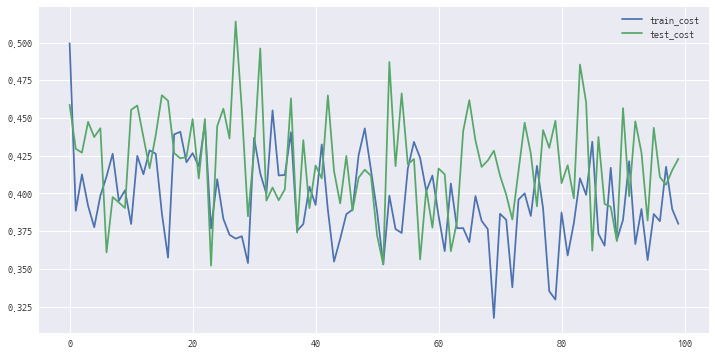

In [33]:
plt.figure(figsize=(12,6))
plt.plot(train_cost_ls, label = 'train_cost')
plt.plot(test_cost_ls, label = 'test_cost')

plt.legend(loc = 'best')